In [12]:
import numpy as np
import cv2 as cv2
from matplotlib import pyplot as plt
from imutils.object_detection import non_max_suppression

In [13]:
# image = cv2.imread('img3.bmp', 0)[500:1550,550:1900]
# # image = cv2.resize(image, (2700,2100), interpolation = cv2.INTER_AREA)
# image_color = cv2.imread('img3.bmp')[500:1550,550:1900]
# # image_color = cv2.resize(image_color, (2700,2100), interpolation = cv2.INTER_AREA)
# template = image[53:71,68:86]

In [14]:
image = cv2.imread('img2.bmp', 0)[570:1280,850:1700]
image = cv2.resize(image, (2000,2000), interpolation = cv2.INTER_AREA)
image_color = cv2.imread('img2.bmp')[570:1280,850:1700]
image_color = cv2.resize(image_color, (2000,2000), interpolation = cv2.INTER_AREA)
template = image[1730:1960,1450:1655]

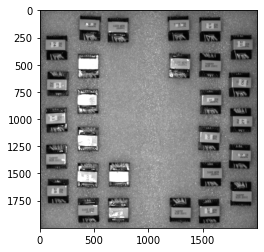

In [15]:
plt.imshow(image, cmap = 'gray')

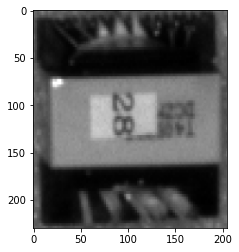

In [16]:
plt.imshow(template, cmap = 'gray')

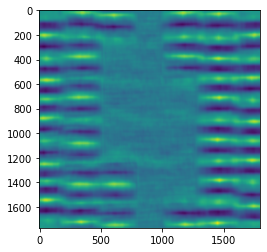

In [17]:
res = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
plt.imshow(res)

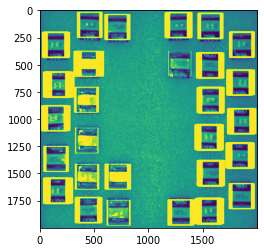

In [18]:
THRESHOLD = 0.67
# res = non_max_suppression(np.array(res))
loc = np.where(res >= THRESHOLD)
w, h = template.shape[1], template.shape[0]
boxes = list()
for y, x in zip(loc[0], loc[1]):
    boxes.append((x, y, x + w, y + h))
    cv2.rectangle(image, (x, y), (x + w, y + h), (255,0,0), 1)
plt.imshow(image)

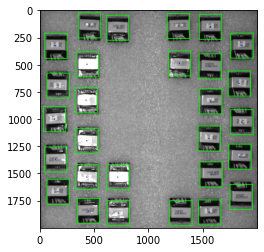

In [19]:
boxes = non_max_suppression(np.array(boxes))
center_points = []
for (x1, y1, x2, y2) in boxes:
    cv2.rectangle(image_color, (x1, y1), (x2, y2), (0, 255, 0), 5)
    x = (x1+x2)//2 - 1
    y = (y1+y2)//2 - 1
    center_points.append([x, y])
    cv2.circle(image_color, (x, y), 5, (0, 0, 255), -1)
plt.imshow(image_color)

In [20]:
center_points = np.array(center_points)
center_points[:,0]+=550
center_points[:,1]+=500

In [21]:
center_points

array([[1841, 2363],
       [1267, 2362],
       [2105, 2356],
       [ 993, 2343],
       [2394, 2213],
       [ 714, 2167],
       [1263, 2033],
       [ 979, 2032],
       [2118, 2007],
       [ 692, 1870],
       [2383, 1844],
       [ 979, 1699],
       [2100, 1678],
       [2401, 1528],
       [ 682, 1500],
       [2115, 1336],
       [ 972, 1327],
       [ 714, 1192],
       [2376, 1173],
       [2111, 1016],
       [ 981,  997],
       [1828,  989],
       [ 694,  827],
       [2401,  825],
       [1258,  661],
       [2113,  653],
       [1818,  645],
       [1001,  640]])

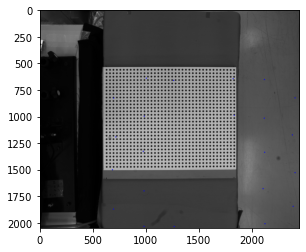

In [22]:
image_origin = cv2.imread('img3.bmp')
for x in center_points:
    cv2.circle(image_origin, (x[0], x[1]), 5, (0, 0, 255), -1)
plt.imshow(image_origin)